# Week 9 Lecture 1
During this week we will explore Jury Selection<br>
- We can simulate data based on the model. That is, we can simulate drawing at randomfrom a population of whom 26% are Black.
- Our simulation will show what a panel would be like if it were selected at random.
- We can then compare the results of the simulation with the composition of an actual jurypanel.
- If the results of our simulation are not consistent with the composition of the panel in thetrial, that will be evidence against the model of random selection. Therefore, it will beevidence against the fairness of the trial.

```
sample_proportions(Sample_size, eligible_population_percentages)  #percentage expected to be either group
```

In [1]:
import numpy as np
from datascience import *

# These lines set up graphing capabilities.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [2]:
# Blacks represented 26% of population and 74% is other.  Use sample_proportions method above to generate percentage selected 
# from the black and other populations
sample_size = 100
eligible_population = [0.26, 0.74]
sample_proportions(sample_size, eligible_population)

array([ 0.36,  0.64])

In [3]:
sample_proportions(sample_size, eligible_population)

array([ 0.3,  0.7])

In [4]:
# create a function that creates counts
def one_simulated_count():
    return sample_size * sample_proportions(sample_size, eligible_population)
    

In [5]:
one_simulated_count()

array([ 31.,  69.])

In [6]:
counts = make_array()
repetititions = 10000
for i in np.arange(repetititions):
    counts = np.append(counts, one_simulated_count().item(0))
    

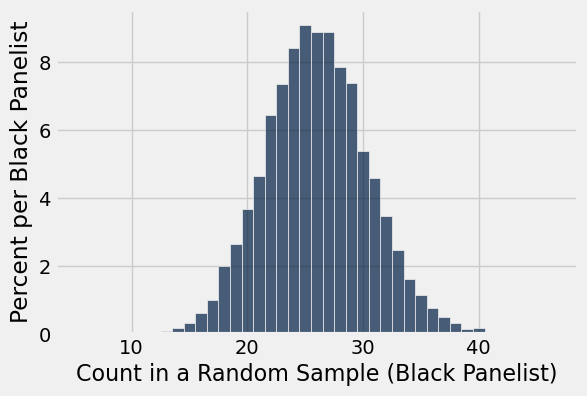

In [7]:
Table().with_column(
    'Count in a Random Sample', counts).hist(bins = np.arange(5.5, 46.6, 1), unit='Black Panelist')

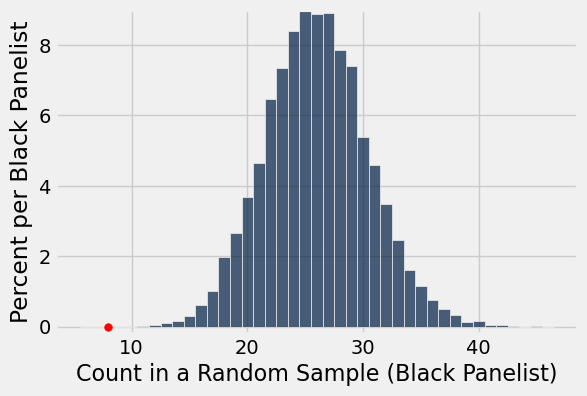

In [8]:
# Comparing the Prediction and the Data
Table().with_column(
    'Count in a Random Sample', counts).hist(bins = np.arange(5.5, 46.6, 1), unit='Black Panelist')
plt.ylim(-0.002, 0.090)
plt.scatter(8,0, color='red', s = 30);

# Conclusion of the Data Analysis
The jury panel was inconsistent with a model generated by random selection

# Statistical Bias
When a process produces errors that are systematically in one direction – such as thepercentage of Black panelists always being lower than expected – then data scientists say theprocess is
biased. Quantification of such bias is an important responsibility of data science.

# Multiple Categories
All individuals should be able to get a jury representative of the population in which they live.  In Alameda county there were more than Black and White jurors.  The ACLU did a study on the racial and ethnic composition of the jury plan in Alameda County.


In [9]:
jury = Table().with_columns(
     'Ethnicity', make_array('Asian/PI', 'Black/AA', 'Caucasian', 'Hispanic', 'Other'),
     'Eligible', make_array(0.15, 0.18, 0.54, 0.12, 0.01),
     'Panels', make_array(0.26, 0.08, 0.54, 0.08, 0.04)
)
jury

Ethnicity | Eligible | Panels
Asian/PI  | 0.15     | 0.26
Black/AA  | 0.18     | 0.08
Caucasian | 0.54     | 0.54
Hispanic  | 0.12     | 0.08
Other     | 0.01     | 0.04

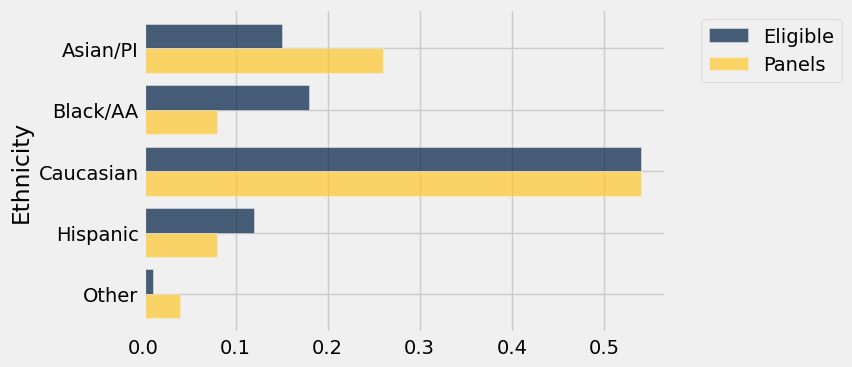

In [10]:
jury.barh('Ethnicity')

In [11]:
sample_size = 1453
eligible_population = jury.column('Eligible')
sample_distribution = sample_proportions(sample_size, eligible_population)
panels_and_sample =jury.with_columns('Random Sample', sample_distribution)
panels_and_sample

Ethnicity | Eligible | Panels | Random Sample
Asian/PI  | 0.15     | 0.26   | 0.146593
Black/AA  | 0.18     | 0.08   | 0.167928
Caucasian | 0.54     | 0.54   | 0.549897
Hispanic  | 0.12     | 0.08   | 0.12457
Other     | 0.01     | 0.04   | 0.0110117

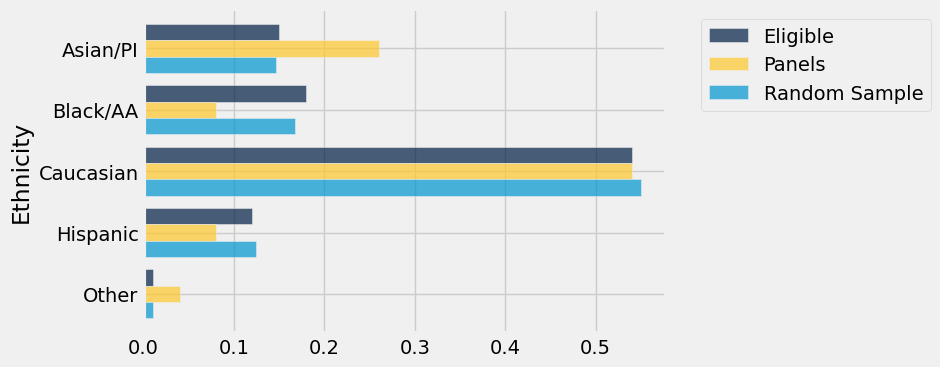

In [12]:
panels_and_sample.barh('Ethnicity')

# Total Variation distance 
Compare the difference between the Eligible and Panels 

In [13]:
# Augment the table with a column of differences between proportions

jury_with_diffs = jury.with_column(
    'Difference', jury.column('Panels') - jury.column('Eligible')
)
jury_with_diffs

Ethnicity | Eligible | Panels | Difference
Asian/PI  | 0.15     | 0.26   | 0.11
Black/AA  | 0.18     | 0.08   | -0.1
Caucasian | 0.54     | 0.54   | 0
Hispanic  | 0.12     | 0.08   | -0.04
Other     | 0.01     | 0.04   | 0.03

In [14]:
jury_with_diffs = jury_with_diffs.with_column(
    'Absolute Difference', np.abs(jury_with_diffs.column('Difference'))
)

jury_with_diffs

Ethnicity | Eligible | Panels | Difference | Absolute Difference
Asian/PI  | 0.15     | 0.26   | 0.11       | 0.11
Black/AA  | 0.18     | 0.08   | -0.1       | 0.1
Caucasian | 0.54     | 0.54   | 0          | 0
Hispanic  | 0.12     | 0.08   | -0.04      | 0.04
Other     | 0.01     | 0.04   | 0.03       | 0.03

In [15]:
jury_with_diffs.column('Absolute Difference').sum() / 2

0.14000000000000001

# Total variation distance (TVD)
Adding the positive results. We will use the total variation distance between distributions as the statistic to simulate under the assumption of random selection. Large values of the distance will be evidence against random selection. 


# Simulating the Statistic Under the Model
TVD will be the statistic used to determine whether eligible populations are  

In [16]:
def total_variation_distance(distribution_1, distribution_2):
    return sum(np.abs(distribution_1 - distribution_2)) / 2

In [17]:
total_variation_distance(jury.column('Panels'), jury.column('Eligible'))

0.14000000000000001

In [18]:
sample_distribution = sample_proportions(1453, eligible_population)
total_variation_distance(sample_distribution, eligible_population)

0.027460426703372287

# Simulating One Value of the Statistic

In [19]:
# Simulate one simulated value of 
# the total variation distance between
# the distribution of a sample selected at random
# and the distribution of the eligible population

def one_simulated_tvd():
    sample_distribution = sample_proportions(1453, eligible_population)
    return total_variation_distance(sample_distribution, eligible_population)   

# Simulating Multiple Values of the Statistic

In [20]:
tvds = make_array()
repetitions = 5000
for i in np.arange(repetitions):
    tvds = np.append(tvds, one_simulated_tvd())

# Assessing the Model of Random Selection
Create the histogram of random simulated values

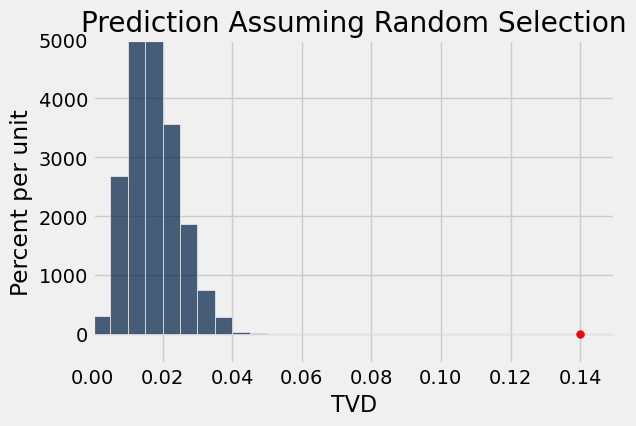

In [21]:
Table().with_column('TVD', tvds).hist(bins=np.arange(0, 0.2, 0.005))

# Plotting parameters; you can ignore this code
plt.title('Prediction Assuming Random Selection')
plt.xlim(0, 0.15)
plt.ylim(-5, 50)
plt.scatter(0.14, 0, color='red', s=30);

# Why the difference?

- Software used to select eligible jurors did not work well.
- It was based on driver's license or identification card issued by the DMV.
- Low income individuals sometimes did not have a fixed address
- Low income individuals would not take off due to jury paying only $15 and employers were not required to pay employee.
- The distribution used for the population of eligible juror might not be accurate since not all criteria for being selected is collected by census.
- No follow up is done for eligible jurors who do not report for jury.
                                                                                                          


# Decisions and Uncertainty
The process we used to assess jury panels is called statistical tests of hypotheses.  In this section we will describe the general sequence of the steps used in statistical tests, along with some terminology.  
# Hypothesis Testing using Mendel's Model
Is based on plants
- 75% chance that a plant has a purple flower
- 25% it has a white flower


# Step 1: The Hypotheses
Two views of the world 
- Null Hypotheses if the data look different from what the null hypotheses predicts the difference is due to nothing but chance.
- Alterative Hyptoheses Some reason other than chance made the data differ from the predictions of the model in the null hypothesis.
# Step 2: The Test Statistics
To decide between two hypothesis, we must choose a statistic that we can use twhat about all over the place?

In [22]:
# Obsered Value of the Test Statistic

observed_statistic = abs ( 100 * (705 / 929) - 75)
observed_statistic

0.8880516684607045

# Step 3: The Distribution of the Test Statistic under the Null Hypothesis
what the values of the test statistic might be if the null hypothesis were true.

In [23]:
mendel_proportions = make_array(0.75, 0.25)
mendel_proportion_purple = mendel_proportions.item(0)
sample_size = 929

In [24]:
# Distribution of the Test Statistics
def one_simulated_distance():
    sample_proportion_purple = sample_proportions(929, mendel_proportions).item(0)
    return 100 * abs(sample_proportion_purple - mendel_proportion_purple)

In [25]:
repetitions = 10000
distances = make_array()
for i in np.arange(repetitions):
    distances = np.append(distances, one_simulated_distance())

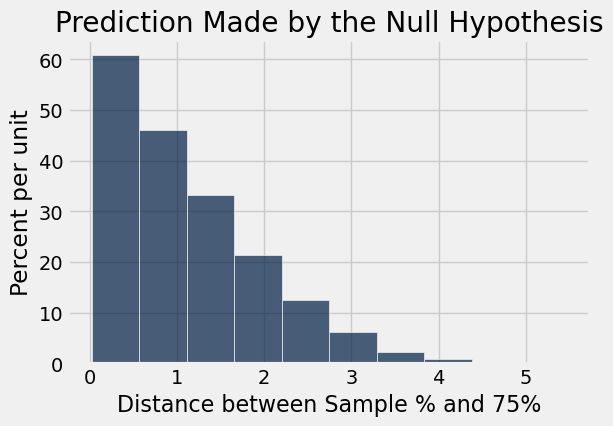

In [26]:
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()
plt.title('Prediction Made by the Null Hypothesis');

# Step 4 Conclusion of the Test
- Compare the null hypothesis model with the Observed data
- If consistent then it supports the null hypothesis
- If not consistent then it it supports the alternative hypothesis

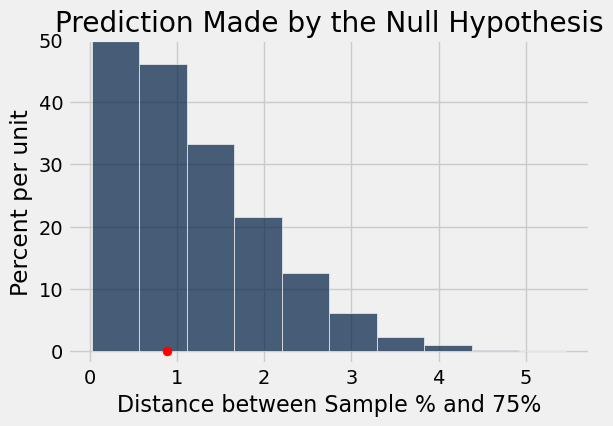

In [27]:
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()
plt.ylim(-0.02, 0.5)
plt.title('Prediction Made by the Null Hypothesis')
plt.scatter(observed_statistic, 0, color='red', s=40);

# Is the Test statistic is consistent with Mendel's model.  <br>
Consistent means<br>
- Provide your judgement along with the test statistics so others can make their own judgement.

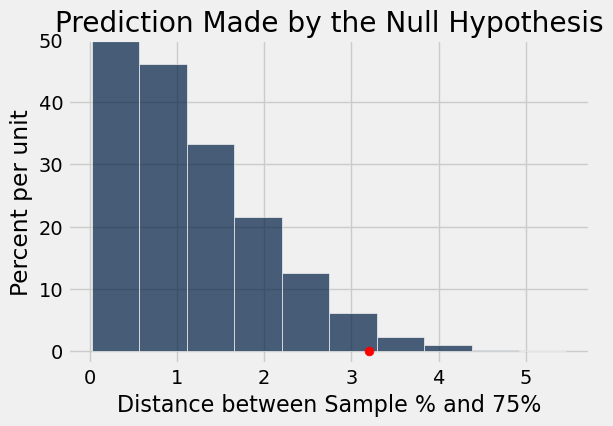

In [28]:
different_observed_statistic = 3.2
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()
plt.ylim(-0.02, 0.5)
plt.title('Prediction Made by the Null Hypothesis')
plt.scatter(different_observed_statistic, 0, color='red', s=40);

# Is the observed difference too far?

# Conventional Cut-offs and the P-value
The conventions are based on the area in the tail, starting at the observed statistic (the red dot) and looking in the direction that makes us lean toward the alternative. In this example that’s the right side, because big distances favor the alternative which says that the model isn’t good.<br>
If the area of the tail is small, the observed statistic is far away from the values most commonly predicted by the null hypothesis.


In [29]:
distances

array([ 0.08073197,  1.69537137,  2.07212056, ...,  1.21097955,
        0.29601722,  0.94187298])

In [30]:
# P-Value
np.count_nonzero(distances >= different_observed_statistic) / repetitions

0.024500000000000001

By the law of averages, we can conclude that if Mendel’s model were correct for these new plants, then there is about a 2.74% chance that the test statistic would be 3.2 or more.

# The P-Value
The p-value of a test is the chance, based on the model in the null hypothesis, that the test statistic will be equal to the observed value in the sample or even further in the direction that supports the alternative.<br>
<br>
How small is “small”? According to the conventions:
- If the p-value is less than 5%, it is considered small and the result is called “statistically significant.”
- If the p-value is even smaller – less than 1% – the result is called “highly statistically significant.”

By this convention, our p-value of 2.74% is considered small. So the conventional conclusion would be to reject the null hypothesis and say that Mendel’s model does not look good for the new plants. Formally, the result of the test is statistically significant.<br>
When you make a conclusion in this way, we recommend that you don’t just say whether or not the result is statistically significant. Along with your conclusion, provide the observed statistic and the p-value as well, so that readers can use their own judgment.<br>

Sir Ronald Fisher set the level of cutoff as considered significant to 5% as a "convenience" to him.  You can set it at different levels depending on the importance of the hypothese test (Medical results required a significance of maybe 1% while social media test requires 5%).
<br>
Whether you use a conventional cutoff or your own judgment, it is important to keep the following points in mind.
- Always provide the observed value of the test statistic and the p-value, so that readers can decide whether or not they think the p-value is small.
- Don’t look to defy convention only when the conventionally derived result is not to your liking.
- Even if a test concludes that the data don’t support the chance model in the null hypothesis, it typically doesn’t explain why the model doesn’t work. Don’t make causal conclusions without further analysis, unless you are running a randomized controlled trial. We will analyze those in a later section.



# The Chance of an Error
Test whether a coin is fair or not.
**Null:** The coin is fair. P(Heads) = P(Tails)<br>
**Alternative:** The coin is not fair<br>

test statistic = | number of heads - 1000|<br>

small values of this statistics favor the null hypothesis, and large values favor the alternative.



In [53]:
eligible_population=make_array(.5, .5)
def one_simulated_coin_tvd():
    sample_distribution = sample_proportions(2000, eligible_population)
    return np.abs(sample_distribution.item(0)*2000 - 1000)   

In [54]:
one_simulated_coin_tvd()

4.0

In [55]:
dist_c = make_array()
repetitions = 10000
for i in np.arange(repetitions):
    dist_c = np.append(dist_c, one_simulated_coin_tvd())

dist_c

array([ 30.,  38.,   8., ...,   3.,   7.,  27.])

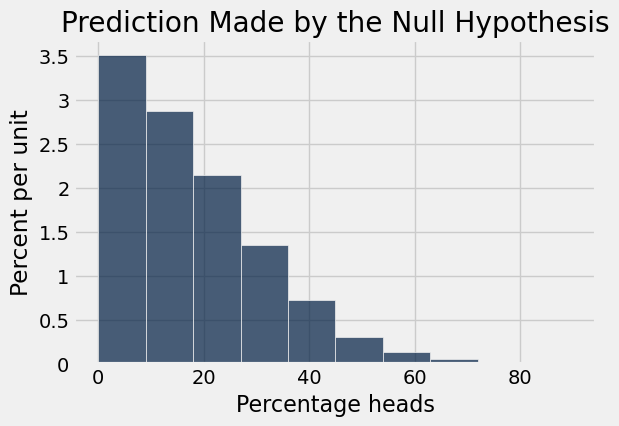

In [56]:
Table().with_column(
    'Percentage heads', dist_c
).hist()
plt.title('Prediction Made by the Null Hypothesis');

In [57]:
dist_c


array([ 30.,  38.,   8., ...,   3.,   7.,  27.])

In [66]:
np.count_nonzero(dist_c >= 45) / repetitions

0.0453

43.049999999999272